### Financial Fraud  Dataset
 representation of mobile money transactions, meticulously crafted to mirror the complexities of real-world financial activities while integrating fraudulent behaviors for research purposes.

 Derived from a simulator named PaySim, which utilizes aggregated data from actual financial logs of a mobile money service in an African country, this dataset aims to fill the gap in publicly available financial datasets for fraud detection studies. It encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER over a simulated period of 30 days, providing a comprehensive environment for evaluating fraud detection methodologies.



It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components

These logs were provided by a multinational company that offers this financial service across more than 14 countries globally.

## Dataset Description


step: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.

type: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

amount: The transaction amount in the local currency.

nameOrig: The customer initiating the transaction.

oldbalanceOrg: The initial balance before the transaction.

newbalanceOrig: The new balance after the transaction.

nameDest: The transaction's recipient customer.

oldbalanceDest: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).

newbalanceDest: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).

isFraud: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.

isFlaggedFraud: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.

In [1]:
!unzip /content/Synthetic_Financial_datasets_log.csv.zip

Archive:  /content/Synthetic_Financial_datasets_log.csv.zip
  inflating: Synthetic_Financial_datasets_log.csv  


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Synthetic_Financial_datasets_log.csv")

In [4]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isna().sum() #checks for missing values , and no missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
#Finding the unique values in each columns

for col in data.columns:
  print(data[col].value_counts())

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
245        4
28         4
655        4
112        2
662        2
Name: count, Length: 743, dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
20464.65          1
26299.05          1
401295.63         1
499807.64         1
1136700.07        1
Name: count, Length: 5316900, dtype: int64
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64
oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
87528.25           1
42686.88    

# EDA

In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



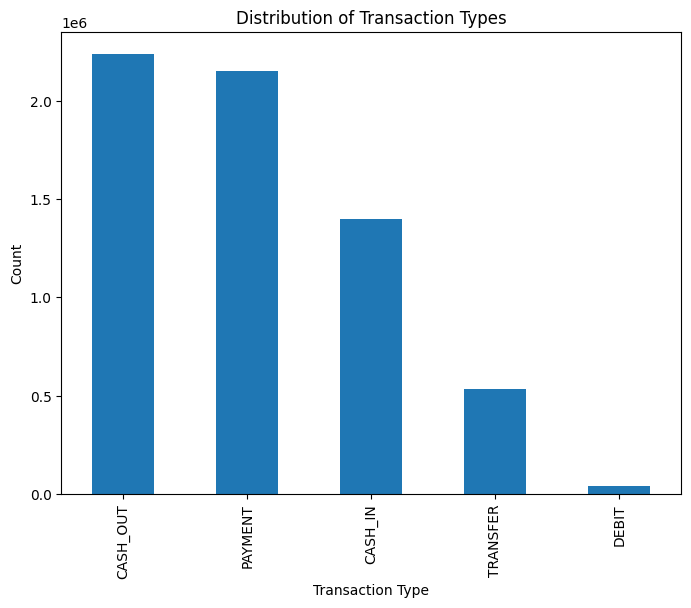

In [12]:
plt.figure(figsize=(8,6))
data['type'].value_counts().plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

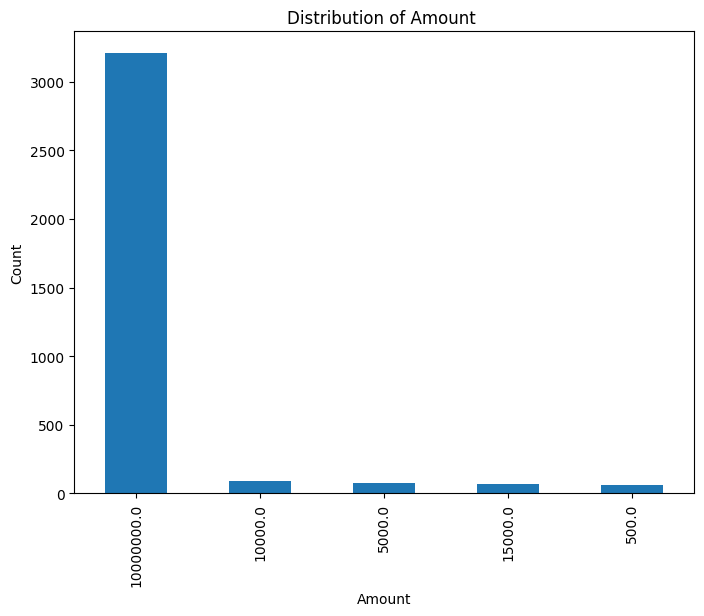

In [13]:
plt.figure(figsize=(8,6))
data['amount'].value_counts().sort_values(ascending=False).head().plot(kind='bar') #Just plot the top 5
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount ')
plt.show()

10000000.00  occurs  3207, Is this a default value or a system generate d value or  are others outliers?


In [14]:
counts = data.groupby('type').count()['amount']
print(counts)

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64


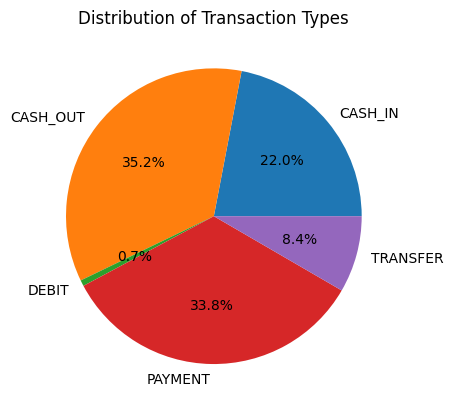

In [15]:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transaction Types')
plt.show()

In [16]:
# Cash out , cash in and payment may have more fraud possiblities than others
#Cashin - depotsit into an acc, cashout, payment - move out of account, debit - atm withdrawals etc



In [17]:
data.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [18]:
#Fraud transaction present in cash_out and transfer!!! These may be mostly social engineering attacks

numeric_cols = data.select_dtypes(include=['int','float']).columns
numeric_data = data[numeric_cols]

correlation_mat= numeric_data.corr()

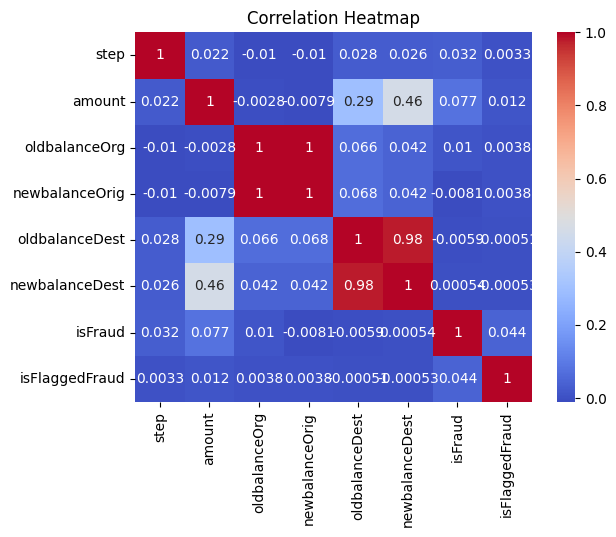

In [19]:
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Analyzing correlation marix -- Amount has more common with new_Balance_Dest which makes sense as larger the transacton, more money should be received
# oldbalanceOrigin and newBalance Orig is almost 1 which make sense because oldOrigin is changed rhen newBalance would be changed

#Is FRaud(dependent) and Transaction Amount(independent) has large amount of linearity(moderately strong)


#IsFraud and isFlaggedFrayd while an association exists, it's moderate


In [21]:
#We can drop oldBalanceOrig and NewBalance_orig, oldBalanceDest, and newBalance Dest

data.drop(['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest', 'nameDest','nameOrig' ], axis=1,inplace=True)

In [22]:
data.head() #data way cleaner

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [23]:
from sklearn. preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [24]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ML Modelling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = lr_model.predict(X_test)

In [30]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print("Classification Report:")
print(classification_report_lr)

Accuracy: 0.9987086032693031
Precision: 0.1590909090909091
Recall: 0.002874743326488706
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.16      0.00      0.01      2435

    accuracy                           1.00   1908786
   macro avg       0.58      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



Logistic model has a very high accuracy in modelling the data of 99.87%, however it's precision and recall of positive classes are very low at 16% and 0.29%, which means it struggles to detect fraud

In [31]:
#Logistic Regression we can say underfits or is unable to classify fraud, we can try neural networks, but neural networks need more data
#and cannot be a good use for detecting fraud or lesser data, so let's check out decision trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=20)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


In [33]:
accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred)
recall_dtc = recall_score(y_test, y_pred)
classification_report_dtc = classification_report(y_test, y_pred)

print("Decision Trees")
print(f"Accuracy : {accuracy_dtc}")
print(f"Precision: {precision_dtc}")
print(f"Recall: {recall_dtc}")
print("Classification Report:")
print(classification_report_dtc)

Decision Trees
Accuracy : 0.9989794560521714
Precision: 0.6659850034083163
Recall: 0.40123203285420944
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.67      0.40      0.50      2435

    accuracy                           1.00   1908786
   macro avg       0.83      0.70      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



In [34]:
### As we can see, decision tree performs amazingly it's able to give a accuracy of 0.998 meanwhile giving a precision for 66% in fraud cases,
## and 40% recall

In [35]:
# plt.figure()

# tree.plot_tree(dtc,
#                    feature_names = data.columns,
#                    filled = True)
# plt.savefig('testfig.svg', format='svg')


The above tree is pretty messy (As there are 100 estimators)

In [36]:
# What about random forests?

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, max_depth=3)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)



In [37]:
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
classification_report_rfc = classification_report(y_test, y_pred)

print("Random Forest")
print(f"Accuracy : {accuracy_rfc}")
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print("Classification Report:")
print(classification_report_rfc)

Random Forest
Accuracy : 0.9988579128304588
Precision: 1.0
Recall: 0.10472279260780287
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      0.10      0.19      2435

    accuracy                           1.00   1908786
   macro avg       1.00      0.55      0.59   1908786
weighted avg       1.00      1.00      1.00   1908786



In [38]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.4 MB/s eta 0:00:00


In [39]:
len(rfc.estimators_)

10

<Figure size 640x480 with 0 Axes>

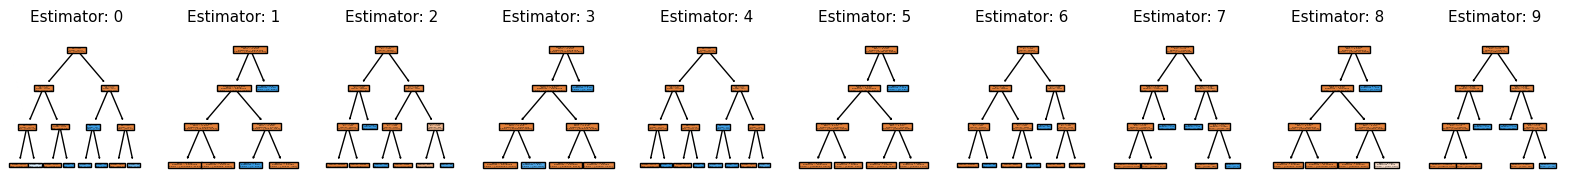

In [40]:
from sklearn import tree
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 10,figsize = (20,2))
for index in range(0, 10):
    tree.plot_tree(rfc.estimators_[index],
                   feature_names = data.columns,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

plt.savefig('random_forest.svg', format='svg')

[Text(0.625, 0.875, 'step <= 3.338\ngini = 0.003\nsamples = 2815763\nvalue = [4448049, 5785]'),
 Text(0.5, 0.625, 'type <= 1.323\ngini = 0.003\nsamples = 2815645\nvalue = [4448049, 5605]'),
 Text(0.25, 0.375, 'amount <= 1.851\ngini = 0.001\nsamples = 2580102\nvalue = [4078453, 2846]'),
 Text(0.125, 0.125, 'gini = 0.001\nsamples = 2579555\nvalue = [4078361, 2042]'),
 Text(0.375, 0.125, 'gini = 0.184\nsamples = 547\nvalue = [92, 804]'),
 Text(0.75, 0.375, 'step <= 1.16\ngini = 0.015\nsamples = 235543\nvalue = [369596, 2759]'),
 Text(0.625, 0.125, 'gini = 0.009\nsamples = 220080\nvalue = [346344, 1612]'),
 Text(0.875, 0.125, 'gini = 0.09\nsamples = 15463\nvalue = [23252, 1147]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 118\nvalue = [0, 180]')]

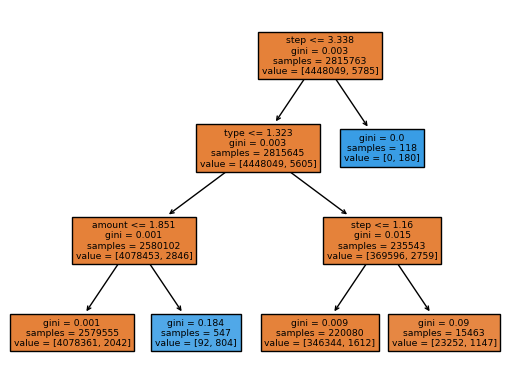

In [41]:
tree.plot_tree(rfc.estimators_[3],
                   feature_names = data.columns,
                   filled = True)

In [42]:
performance = pd.DataFrame({
    'models': [ 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'accuracy': [accuracy_lr, accuracy_dtc, accuracy_rfc],
    'precision': [precision_lr, precision_dtc, precision_rfc],
    'recall': [recall_lr, recall_dtc, recall_rfc]
})

performance

,models,accuracy,precision,recall
0,Logistic Regression,0.998709,0.159091,0.002875
1,Decision Tree,0.998979,0.665985,0.401232
2,Random Forest,0.998858,1.000000,0.104723


# widget for display

In [43]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s 

In [44]:
data.describe()

,step,type,amount,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,1.000000e+00,1.000000e+00


In [45]:
import gradio as gr

import pickle

def cleanup(var):
  return "True" if var == "1" else "False"

def greet(step,type1,amount,isFlaggedFraud):
    isFlaggedFraud = 1 if isFlaggedFraud == "True" else 0
    type1 = le.transform([type1])[0]
    output = sc.transform([[step,type1,amount,isFlaggedFraud]])
    dtc_output = dtc.predict(output)[0]
    rfc_output = rfc.predict(output)[0]
    lr_output = lr_model.predict(output)[0]
    output = "Decision Tree says "+ cleanup(str(dtc_output))+" and Random Forest says "+ cleanup(str(rfc_output))+" and Logistic Regression says "+ cleanup(str(lr_output))

    return output

demo = gr.Interface(
    fn=greet,
    inputs=[gr.Slider(1,743),
    gr.Radio(["CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER"]),
    "number",
    gr.Radio(["True","False"])
    ],
    outputs=["text"]
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b81cfcf3f74370492b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [46]:


dict_for_pickling = {'le_params':le, 'sc':sc, 'dtc':dtc, 'rfc':rfc, 'lr_model':lr_model}
with open('dict_for_pickling.pkl', 'wb') as f:
    pickle.dump(dict_for_pickling, f)

In [47]:
with open(r'dict_for_pickling.pkl', 'rb') as f:
    dict_for_unpickling = pickle.load(f)

In [51]:
dict_for_unpickling['le'].transform(["CASH_OUT"])

array([1])